# Using the Wisconsin breast cancer diagnostic data set for predictive analysis



#Load Libraries

In [29]:
from pennylane import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec # subplots

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Load the data

In [30]:
df = pd.read_csv("data.csv",header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Clean and prepare data

In [31]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)

df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df['diagnosis'] = df['diagnosis'].astype(int)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


# Explore data

In [32]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


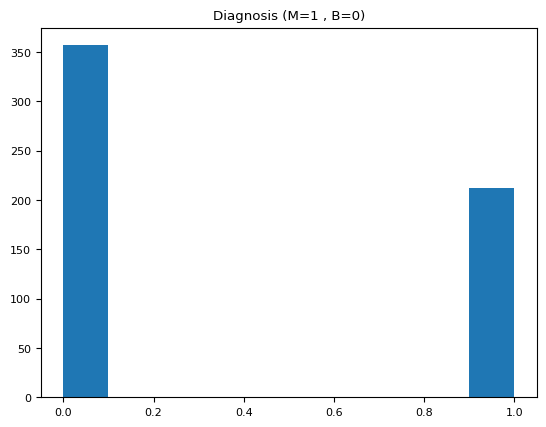

In [33]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

### Nucleus features vs Diagnosis

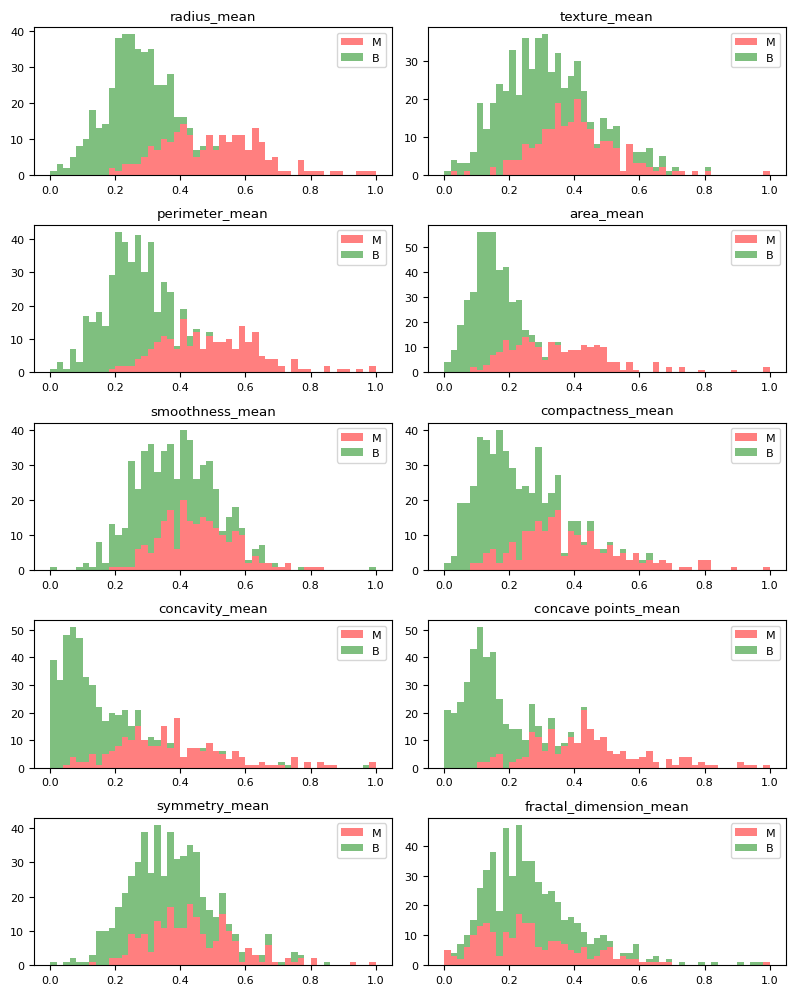

In [34]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

### Observations

1. mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors. 
2. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup.

## Creating a test set and a training set


In [35]:
traindf, testdf = train_test_split(df, test_size = 0.3)

## Model Classification

Here we are going to build a classification model and evaluate its performance using the training set.



In [36]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(5)
  error = []
  for train, test in kf.split(traindf):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

### Logistic Regression model

Based on the observations in the histogram plots, we can reasonably hypothesize that the cancer diagnosis depends on the mean cell radius, mean perimeter, mean area, mean compactness, mean concavity and mean concave points. We can then  perform a logistic regression analysis using those features as follows:

In [9]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 90.704%
Cross-Validation Score : 90.000%
Cross-Validation Score : 92.500%
Cross-Validation Score : 91.250%
Cross-Validation Score : 90.273%
Cross-Validation Score : 90.699%


### Decision Tree Model

In [10]:
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 88.750%
Cross-Validation Score : 88.750%
Cross-Validation Score : 89.167%
Cross-Validation Score : 89.660%
Cross-Validation Score : 89.449%


### Random Forest

In [11]:
# Use all the features of the nucleus
predictor_var = features_mean
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, traindf,predictor_var,outcome_var)

Accuracy : 95.226%
Cross-Validation Score : 91.250%
Cross-Validation Score : 93.125%
Cross-Validation Score : 92.500%
Cross-Validation Score : 92.476%
Cross-Validation Score : 92.968%


Using all the features improves the prediction accuracy and the cross-validation score is great.

# Quantum Classifier

In [37]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
import math

import matplotlib.pyplot as plt
%matplotlib inline


def reshape_x(input_array):
    # Calculate the number of subarrays needed
    num_subarrays = len(input_array) // 3 + (len(input_array) % 3 != 0)

    # Split the array into subarrays of size 3
    subarrays = [input_array[i * 3:(i + 1) * 3] for i in range(num_subarrays)]

    # Check if the last subarray has fewer than 3 elements and pad with zeros if necessary
    if len(subarrays[-1]) < 3:
        subarrays[-1] = np.pad(subarrays[-1], (0, 3 - len(subarrays[-1])), mode='constant')
        
    return subarrays


def cost(params, x, y, state_labels=None):
    """Cost function to be minimized.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): array of state representations for labels

    Returns:
        float: loss value to be minimized
    """
    # Compute prediction for each input in data batch
    loss = 0.0
    dm_labels = [density_matrix(s) for s in state_labels]
    for i in range(len(x)):
        f = qcircuit(params, x[i], dm_labels[y[i]])
        loss = loss + (1 - f) ** 2
    return loss / len(x)

def test(params, x, y, state_labels=None):
    """
    Tests on a given set of data.

    Args:
        params (array[float]): array of parameters
        x (array[float]): 2-d array of input vectors
        y (array[float]): 1-d array of targets
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        predicted (array([int]): predicted labels for test data
        output_states (array[float]): output quantum states from the circuit
    """
    fidelity_values = []
    dm_labels = [density_matrix(s) for s in state_labels]
    predicted = []

    for i in range(len(x)):
        fidel_function = lambda y: qcircuit(params, x[i], y)
        fidelities = [fidel_function(dm) for dm in dm_labels]
        best_fidel = np.argmax(fidelities)

        predicted.append(best_fidel)
        fidelity_values.append(fidelities)

    return np.array(predicted), np.array(fidelity_values)


def accuracy_score(y_true, y_pred):
    """Accuracy score.

    Args:
        y_true (array[float]): 1-d array of targets
        y_predicted (array[float]): 1-d array of predictions
        state_labels (array[float]): 1-d array of state representations for labels

    Returns:
        score (float): the fraction of correctly classified samples
    """
    score = y_true == y_pred
    return score.sum() / len(y_true)

def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return state * np.conj(state).T

label_0 = [[1], [0]]
label_1 = [[0], [1]]
state_labels = np.array([label_0, label_1], requires_grad=False)


def iterate_minibatches(inputs, targets, batch_size):
    """
    A generator for batches of the input data

    Args:
        inputs (array[float]): input data
        targets (array[float]): targets

    Returns:
        inputs (array[float]): one batch of input data of length `batch_size`
        targets (array[float]): one batch of targets of length `batch_size`
    """
    for start_idx in range(0, inputs.shape[0] - batch_size + 1, batch_size):
        idxs = slice(start_idx, start_idx + batch_size)
        yield inputs[idxs], targets[idxs]
        

In [38]:
def train_q_classifier(num_layers = 10, stepsize = 0.1, momentum = 0.9, epochs = 10, batch_size = 32, n_qubits=1):

    X_train = traindf[features_mean].to_numpy()
    y_train = traindf['diagnosis'].to_numpy()
    X_test = testdf[features_mean].to_numpy()
    y_test = testdf['diagnosis'].to_numpy()
    
    

    opt = NesterovMomentumOptimizer(stepsize=0.1, momentum=0.9)

    # initialize random weights
    params = np.random.uniform(size=(num_layers, 2*n_qubits, X_train.shape[1]), requires_grad=True)

    predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
    accuracy_train = accuracy_score(y_train, predicted_train)

    predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
    accuracy_test = accuracy_score(y_test, predicted_test)

    # save predictions with random weights for comparison
    initial_predictions = predicted_test

    loss = cost(params, X_test, y_test, state_labels)

    print(
        "Epoch: {:2d} | Cost: {:3f} | Train accuracy: {:3f} | Test Accuracy: {:3f}".format(
            0, loss, accuracy_train, accuracy_test
        )
    )

    for it in range(epochs):
        for Xbatch, ybatch in iterate_minibatches(X_train, y_train, batch_size=batch_size):
            params, _, _, _ = opt.step(cost, params, Xbatch, ybatch, state_labels)

        predicted_train, fidel_train = test(params, X_train, y_train, state_labels)
        accuracy_train = accuracy_score(y_train, predicted_train)
        loss = cost(params, X_train, y_train, state_labels)

        predicted_test, fidel_test = test(params, X_test, y_test, state_labels)
        accuracy_test = accuracy_score(y_test, predicted_test)
        res = [it + 1, loss, accuracy_train, accuracy_test]
        print(
            "Epoch: {:2d} | Loss: {:3f} | Train accuracy: {:3f} | Test accuracy: {:3f}".format(
                *res
            )
        )
        
    return params, float(accuracy_test)

# 1 Qubit

In [40]:
dev = qml.device("lightning.gpu", wires=1)

@qml.qnode(dev, interface="autograd")
def qcircuit(params, x, y):
    """A variational quantum circuit representing the Universal classifier.

    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    for p in params: # Iterate num_layer times
        w = p[0]
        b = p[1]
        encoding = w * x + b
        encoding = reshape_x(encoding)
        for encoding_sub in encoding:
            qml.Rot(*encoding_sub, wires=0)
    return qml.expval(qml.Hermitian(y, wires=[0]))

In [16]:
%%time
params, accuracy = train_q_classifier(num_layers=1, stepsize=0.2, epochs=10)
print(f'Accuracy of 1 qubit model with 1 layer: {accuracy}')

Epoch:  0 | Cost: 0.223083 | Train accuracy: 0.600503 | Test Accuracy: 0.690058
Epoch:  1 | Loss: 0.208008 | Train accuracy: 0.809045 | Test accuracy: 0.865497
Epoch:  2 | Loss: 0.171135 | Train accuracy: 0.798995 | Test accuracy: 0.847953
Epoch:  3 | Loss: 0.144828 | Train accuracy: 0.844221 | Test accuracy: 0.877193
Epoch:  4 | Loss: 0.128800 | Train accuracy: 0.869347 | Test accuracy: 0.888889
Epoch:  5 | Loss: 0.118355 | Train accuracy: 0.874372 | Test accuracy: 0.906433
Epoch:  6 | Loss: 0.111177 | Train accuracy: 0.874372 | Test accuracy: 0.923977
Epoch:  7 | Loss: 0.105976 | Train accuracy: 0.881910 | Test accuracy: 0.923977
Epoch:  8 | Loss: 0.101954 | Train accuracy: 0.884422 | Test accuracy: 0.929825
Epoch:  9 | Loss: 0.098695 | Train accuracy: 0.884422 | Test accuracy: 0.929825
Epoch: 10 | Loss: 0.095968 | Train accuracy: 0.884422 | Test accuracy: 0.935673
Accuracy of 1 qubit model with 1 layer: 0.935672514619883
CPU times: user 1min 11s, sys: 96.5 ms, total: 1min 11s
Wall t

In [17]:
%%time
params, accuracy = train_q_classifier(num_layers=3, stepsize=0.2, epochs=10)
print(f'Accuracy of 1 qubit model with 3 layer: {accuracy}')

Epoch:  0 | Cost: 0.227402 | Train accuracy: 0.613065 | Test Accuracy: 0.684211
Epoch:  1 | Loss: 0.093176 | Train accuracy: 0.917085 | Test accuracy: 0.935673
Epoch:  2 | Loss: 0.075773 | Train accuracy: 0.919598 | Test accuracy: 0.941520
Epoch:  3 | Loss: 0.069414 | Train accuracy: 0.924623 | Test accuracy: 0.947368
Epoch:  4 | Loss: 0.065207 | Train accuracy: 0.924623 | Test accuracy: 0.947368
Epoch:  5 | Loss: 0.062481 | Train accuracy: 0.924623 | Test accuracy: 0.953216
Epoch:  6 | Loss: 0.060678 | Train accuracy: 0.924623 | Test accuracy: 0.953216
Epoch:  7 | Loss: 0.059393 | Train accuracy: 0.927136 | Test accuracy: 0.959064
Epoch:  8 | Loss: 0.058423 | Train accuracy: 0.932161 | Test accuracy: 0.959064
Epoch:  9 | Loss: 0.057674 | Train accuracy: 0.932161 | Test accuracy: 0.959064
Epoch: 10 | Loss: 0.057076 | Train accuracy: 0.927136 | Test accuracy: 0.959064
Accuracy of 1 qubit model with 3 layer: 0.9590643274853801
CPU times: user 2min 55s, sys: 40.2 ms, total: 2min 55s
Wall 

In [42]:
%%time
params, accuracy = train_q_classifier(num_layers=5, stepsize=0.2, epochs=5)
print(f'Accuracy of 2 qubit model with 5 layer: {accuracy}')

Epoch:  0 | Cost: 0.257892 | Train accuracy: 0.658291 | Test Accuracy: 0.643275
Epoch:  1 | Loss: 0.072551 | Train accuracy: 0.922111 | Test accuracy: 0.877193
Epoch:  2 | Loss: 0.060675 | Train accuracy: 0.929648 | Test accuracy: 0.894737
Epoch:  3 | Loss: 0.056736 | Train accuracy: 0.937186 | Test accuracy: 0.888889
Epoch:  4 | Loss: 0.054953 | Train accuracy: 0.937186 | Test accuracy: 0.888889
Epoch:  5 | Loss: 0.053655 | Train accuracy: 0.932161 | Test accuracy: 0.900585
Accuracy of 2 qubit model with 5 layer: 0.9005847953216374
CPU times: user 2min 57s, sys: 40 ms, total: 2min 57s
Wall time: 2min 57s


In [18]:
%%time
params, accuracy = train_q_classifier(num_layers=10, stepsize=0.2, epochs=5)
print(f'Accuracy of 1 qubit model with 10 layer: {accuracy}')

Epoch:  0 | Cost: 0.448108 | Train accuracy: 0.276382 | Test Accuracy: 0.216374
Epoch:  1 | Loss: 0.075437 | Train accuracy: 0.904523 | Test accuracy: 0.935673
Epoch:  2 | Loss: 0.063969 | Train accuracy: 0.907035 | Test accuracy: 0.929825
Epoch:  3 | Loss: 0.059339 | Train accuracy: 0.919598 | Test accuracy: 0.953216
Epoch:  4 | Loss: 0.057233 | Train accuracy: 0.922111 | Test accuracy: 0.947368
Epoch:  5 | Loss: 0.055868 | Train accuracy: 0.922111 | Test accuracy: 0.947368
Accuracy of 1 qubit model with 10 layer: 0.9473684210526315
CPU times: user 4min 48s, sys: 45.6 ms, total: 4min 48s
Wall time: 4min 48s


# 2 Qubits

In [21]:
dev = qml.device("lightning.gpu", wires=2)

@qml.qnode(dev, interface="autograd")
def qcircuit(params, x, y):
    """A variational quantum circuit representing the Universal classifier.

    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    for l in range(params.shape[0]): # Iterate num_layers times
        w_0 = params[l, 0]
        b_0 = params[l, 1]
        w_1 = params[l, 2]
        b_1 = params[l, 3]
        
        encoding_0 = w_0 * x + b_0
        encoding_0 = reshape_x(encoding_0)
        
        encoding_1 = w_1 * x + b_1
        encoding_1 = reshape_x(encoding_1)
        
        for i in range(len(encoding_0)):
            qml.Rot(*(encoding_0[i]), wires=0)
            qml.Rot(*(encoding_1[i]), wires=1)
        
        qml.CZ([0, 1]) 
    
    return qml.expval(qml.Hermitian(y, wires=[0]))


/home/vishwa/QC/604/quantum-image-classifier/.venv/lib/python3.10/site-packages/pennylane_lightning/lightning_gpu/lightning_gpu.py:958: UserWarning: 
                "Pre-compiled binaries for lightning.gpu are not available. Falling back to "
                "using the Python-based default.qubit implementation. To manually compile from "
                "source, follow the instructions at "
                "https://pennylane-lightning.readthedocs.io/en/latest/installation.html.",
            
  warn(


In [22]:
%%time
params, accuracy = train_q_classifier(num_layers=1, stepsize=0.2, epochs=10, n_qubits=2)
print(f'Accuracy of 2 qubit model with 1 layer: {accuracy}')

Epoch:  0 | Cost: 0.259219 | Train accuracy: 0.600503 | Test Accuracy: 0.690058
Epoch:  1 | Loss: 0.167221 | Train accuracy: 0.874372 | Test accuracy: 0.923977
Epoch:  2 | Loss: 0.141355 | Train accuracy: 0.874372 | Test accuracy: 0.935673
Epoch:  3 | Loss: 0.121548 | Train accuracy: 0.886935 | Test accuracy: 0.941520
Epoch:  4 | Loss: 0.109110 | Train accuracy: 0.886935 | Test accuracy: 0.947368
Epoch:  5 | Loss: 0.100849 | Train accuracy: 0.889447 | Test accuracy: 0.953216
Epoch:  6 | Loss: 0.094956 | Train accuracy: 0.889447 | Test accuracy: 0.953216
Epoch:  7 | Loss: 0.090670 | Train accuracy: 0.891960 | Test accuracy: 0.953216
Epoch:  8 | Loss: 0.087470 | Train accuracy: 0.899497 | Test accuracy: 0.953216
Epoch:  9 | Loss: 0.085049 | Train accuracy: 0.899497 | Test accuracy: 0.953216
Epoch: 10 | Loss: 0.083205 | Train accuracy: 0.902010 | Test accuracy: 0.953216
Accuracy of 2 qubit model with 1 layer: 0.9532163742690059
CPU times: user 2min 9s, sys: 70.1 ms, total: 2min 9s
Wall ti

In [23]:
%%time
params, accuracy = train_q_classifier(num_layers=3, stepsize=0.2, epochs=10, n_qubits=2)
print(f'Accuracy of 2 qubit model with 3 layer: {accuracy}')

Epoch:  0 | Cost: 0.229951 | Train accuracy: 0.650754 | Test Accuracy: 0.596491
Epoch:  1 | Loss: 0.086624 | Train accuracy: 0.917085 | Test accuracy: 0.923977
Epoch:  2 | Loss: 0.074563 | Train accuracy: 0.917085 | Test accuracy: 0.935673
Epoch:  3 | Loss: 0.069539 | Train accuracy: 0.922111 | Test accuracy: 0.947368
Epoch:  4 | Loss: 0.066253 | Train accuracy: 0.919598 | Test accuracy: 0.947368
Epoch:  5 | Loss: 0.064169 | Train accuracy: 0.919598 | Test accuracy: 0.947368
Epoch:  6 | Loss: 0.062853 | Train accuracy: 0.919598 | Test accuracy: 0.953216
Epoch:  7 | Loss: 0.061967 | Train accuracy: 0.924623 | Test accuracy: 0.947368
Epoch:  8 | Loss: 0.061329 | Train accuracy: 0.924623 | Test accuracy: 0.947368
Epoch:  9 | Loss: 0.060846 | Train accuracy: 0.924623 | Test accuracy: 0.947368
Epoch: 10 | Loss: 0.060451 | Train accuracy: 0.924623 | Test accuracy: 0.935673
Accuracy of 2 qubit model with 3 layer: 0.935672514619883
CPU times: user 5min 41s, sys: 80 ms, total: 5min 42s
Wall tim

In [24]:
%%time
params, accuracy = train_q_classifier(num_layers=10, stepsize=0.2, epochs=5, n_qubits=2)
print(f'Accuracy of 2 qubit model with 10 layer: {accuracy}')

Epoch:  0 | Cost: 0.125705 | Train accuracy: 0.824121 | Test Accuracy: 0.894737
Epoch:  1 | Loss: 0.085281 | Train accuracy: 0.891960 | Test accuracy: 0.918129
Epoch:  2 | Loss: 0.068655 | Train accuracy: 0.917085 | Test accuracy: 0.935673
Epoch:  3 | Loss: 0.063298 | Train accuracy: 0.917085 | Test accuracy: 0.941520
Epoch:  4 | Loss: 0.060342 | Train accuracy: 0.914573 | Test accuracy: 0.947368
Epoch:  5 | Loss: 0.058403 | Train accuracy: 0.919598 | Test accuracy: 0.947368
Accuracy of 2 qubit model with 10 layer: 0.9473684210526315
CPU times: user 9min 39s, sys: 140 ms, total: 9min 40s
Wall time: 9min 40s


# 4 Qubits

In [25]:
dev = qml.device("lightning.gpu", wires=4)

@qml.qnode(dev, interface="autograd")
def qcircuit(params, x, y):
    """A variational quantum circuit representing the Universal classifier.

    Args:
        params (array[float]): array of parameters
        x (array[float]): single input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    for l in range(params.shape[0]): # Iterate num_layers times
        
        w_0 = params[l, 0]
        b_0 = params[l, 1]
        w_1 = params[l, 2]
        b_1 = params[l, 3]
        w_2 = params[l, 4]
        b_2 = params[l, 5]
        w_3 = params[l, 6]
        b_3 = params[l, 7]
        
        
        encoding_0 = w_0 * x + b_0
        encoding_0 = reshape_x(encoding_0)
        
        encoding_1 = w_1 * x + b_1
        encoding_1 = reshape_x(encoding_1)
        
        encoding_2 = w_2 * x + b_2
        encoding_2 = reshape_x(encoding_2)
        
        encoding_3 = w_3 * x + b_3
        encoding_3 = reshape_x(encoding_3)
        
        for i in range(len(encoding_0)):
            qml.Rot(*(encoding_0[i]), wires=0)
            qml.Rot(*(encoding_1[i]), wires=1)
            qml.Rot(*(encoding_2[i]), wires=2)
            qml.Rot(*(encoding_3[i]), wires=3)
        
        if l % 2 != 0:
            qml.CZ([0, 1])
            qml.CZ([2, 3])
        else:
            qml.CZ([1, 2])
            qml.CZ([0, 3]) 
    
    return qml.expval(qml.Hermitian(y, wires=[0]))


/home/vishwa/QC/604/quantum-image-classifier/.venv/lib/python3.10/site-packages/pennylane_lightning/lightning_gpu/lightning_gpu.py:958: UserWarning: 
                "Pre-compiled binaries for lightning.gpu are not available. Falling back to "
                "using the Python-based default.qubit implementation. To manually compile from "
                "source, follow the instructions at "
                "https://pennylane-lightning.readthedocs.io/en/latest/installation.html.",
            
  warn(


In [26]:
%%time
params, accuracy = train_q_classifier(num_layers=1, stepsize=0.2, epochs=10, n_qubits=4)
print(f'Accuracy of 4 qubit model with 1 layer: {accuracy}')

Epoch:  0 | Cost: 0.282514 | Train accuracy: 0.238693 | Test Accuracy: 0.239766
Epoch:  1 | Loss: 0.237065 | Train accuracy: 0.600503 | Test accuracy: 0.690058
Epoch:  2 | Loss: 0.185182 | Train accuracy: 0.776382 | Test accuracy: 0.830409
Epoch:  3 | Loss: 0.145385 | Train accuracy: 0.874372 | Test accuracy: 0.894737
Epoch:  4 | Loss: 0.123399 | Train accuracy: 0.886935 | Test accuracy: 0.906433
Epoch:  5 | Loss: 0.108686 | Train accuracy: 0.902010 | Test accuracy: 0.923977
Epoch:  6 | Loss: 0.098970 | Train accuracy: 0.902010 | Test accuracy: 0.935673
Epoch:  7 | Loss: 0.092018 | Train accuracy: 0.902010 | Test accuracy: 0.935673
Epoch:  8 | Loss: 0.086958 | Train accuracy: 0.912060 | Test accuracy: 0.929825
Epoch:  9 | Loss: 0.083256 | Train accuracy: 0.922111 | Test accuracy: 0.929825
Epoch: 10 | Loss: 0.080592 | Train accuracy: 0.924623 | Test accuracy: 0.941520
Accuracy of 4 qubit model with 1 layer: 0.9415204678362573
CPU times: user 3min 50s, sys: 60 ms, total: 3min 50s
Wall ti

In [27]:
%%time
params, accuracy = train_q_classifier(num_layers=3, stepsize=0.2, epochs=10, n_qubits=4)
print(f'Accuracy of 4 qubit model with 3 layer: {accuracy}')

Epoch:  0 | Cost: 0.228842 | Train accuracy: 0.600503 | Test Accuracy: 0.695906
Epoch:  1 | Loss: 0.089281 | Train accuracy: 0.912060 | Test accuracy: 0.935673
Epoch:  2 | Loss: 0.075560 | Train accuracy: 0.919598 | Test accuracy: 0.941520
Epoch:  3 | Loss: 0.069659 | Train accuracy: 0.922111 | Test accuracy: 0.953216
Epoch:  4 | Loss: 0.067086 | Train accuracy: 0.922111 | Test accuracy: 0.935673
Epoch:  5 | Loss: 0.065233 | Train accuracy: 0.924623 | Test accuracy: 0.941520
Epoch:  6 | Loss: 0.063888 | Train accuracy: 0.922111 | Test accuracy: 0.941520
Epoch:  7 | Loss: 0.062775 | Train accuracy: 0.922111 | Test accuracy: 0.941520
Epoch:  8 | Loss: 0.061850 | Train accuracy: 0.917085 | Test accuracy: 0.941520
Epoch:  9 | Loss: 0.061059 | Train accuracy: 0.917085 | Test accuracy: 0.947368
Epoch: 10 | Loss: 0.060371 | Train accuracy: 0.917085 | Test accuracy: 0.947368
Accuracy of 4 qubit model with 3 layer: 0.9473684210526315
CPU times: user 11min 20s, sys: 110 ms, total: 11min 20s
Wall

In [28]:
%%time
params, accuracy = train_q_classifier(num_layers=10, stepsize=0.2, epochs=5, n_qubits=4)
print(f'Accuracy of 4 qubit model with 10 layer: {accuracy}')

Epoch:  0 | Cost: 0.215992 | Train accuracy: 0.618090 | Test Accuracy: 0.643275
Epoch:  1 | Loss: 0.094181 | Train accuracy: 0.896985 | Test accuracy: 0.888889
Epoch:  2 | Loss: 0.075145 | Train accuracy: 0.914573 | Test accuracy: 0.929825
Epoch:  3 | Loss: 0.069072 | Train accuracy: 0.909548 | Test accuracy: 0.929825
Epoch:  4 | Loss: 0.066231 | Train accuracy: 0.914573 | Test accuracy: 0.929825
Epoch:  5 | Loss: 0.064272 | Train accuracy: 0.914573 | Test accuracy: 0.929825
Accuracy of 4 qubit model with 10 layer: 0.9298245614035088
CPU times: user 19min 40s, sys: 936 ms, total: 19min 41s
Wall time: 19min 41s
